In [37]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

connct = psycopg2.connect('dbname=WhiskyAdvocate user= postgres password = [redacted] host = 127.0.0.1 port=5432')

In [38]:
#Query the database to recover the needed data for unsupervised learning operations

ds_query = ''' SELECT whiskey_id, fruity_words, wood_words, spicy_words, sweet_words, maillard_words, smoke_words
                FROM features_rev'''

ml_df_full = pd.read_sql(ds_query, connct)

ml_df_full.head()

,whiskey_id,fruity_words,wood_words,spicy_words,sweet_words,maillard_words,smoke_words
0,0,2,1,2,0,0,0
1,1,2,0,0,1,2,0
2,2,1,2,1,1,1,0
3,3,1,0,0,3,0,0
4,4,2,0,0,3,1,0


In [39]:
#close the connection
connct.close()

In [40]:
#git rid of whiskey_id

ml_df = ml_df_full.drop(['whiskey_id'], axis = 1)

#check for missing values
ml_df.isnull().sum()

fruity_words      0
wood_words        0
spicy_words       0
sweet_words       0
maillard_words    0
smoke_words       0
dtype: int64

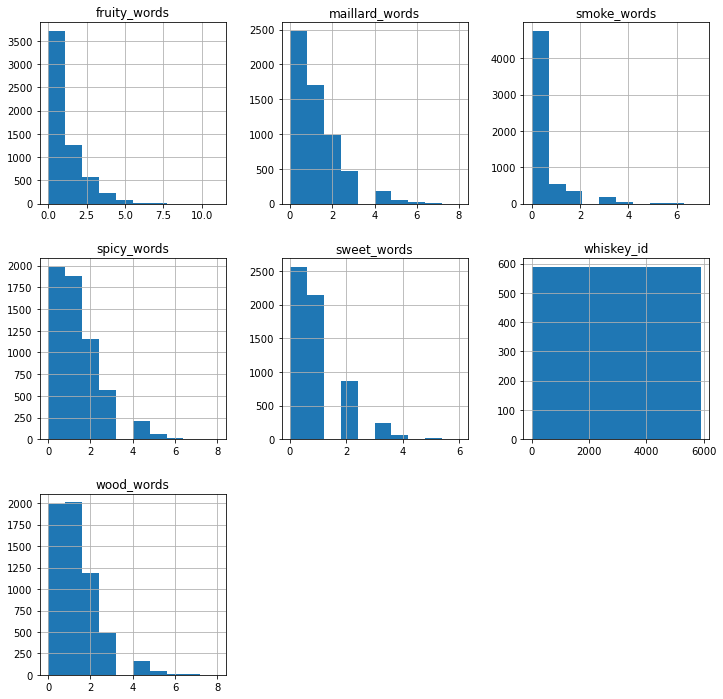

In [41]:
#A few visualizations of the new features

ml_df_full.hist(figsize = (12, 12))

plt.show()

# Visualize separation in data using t-SNE

In [42]:
#import libraries for tSNE and min/max scaler to make sure dimensions have equal 
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [43]:
#scale the data using minmaxscaler

scaler = MinMaxScaler().fit(ml_df)

ml_scale = scaler.transform(ml_df)

ml_scale


array([[0.18181818, 0.125     , 0.25      , 0.        , 0.        ,
        0.        ],
       [0.18181818, 0.        , 0.        , 0.16666667, 0.25      ,
        0.        ],
       [0.09090909, 0.25      , 0.125     , 0.16666667, 0.125     ,
        0.        ],
       ...,
       [0.09090909, 0.        , 0.25      , 0.16666667, 0.25      ,
        0.        ],
       [0.09090909, 0.        , 0.        , 0.        , 0.25      ,
        0.        ],
       [0.18181818, 0.125     , 0.        , 0.        , 0.375     ,
        0.        ]])

In [44]:
# TSNE the scaled data using default hyperparameters and try to visualize it

tsne1 = TSNE(random_state=42)

ws_tsne1 = tsne1.fit_transform(ml_scale)

ws_tsne1

array([[-47.925083 ,  33.80434  ],
       [ 33.113674 ,  -2.0226622],
       [ 34.633842 , -30.20814  ],
       ...,
       [ 25.700945 ,   3.711589 ],
       [  1.2668545,  39.90562  ],
       [  1.5586357,  32.3551   ]], dtype=float32)

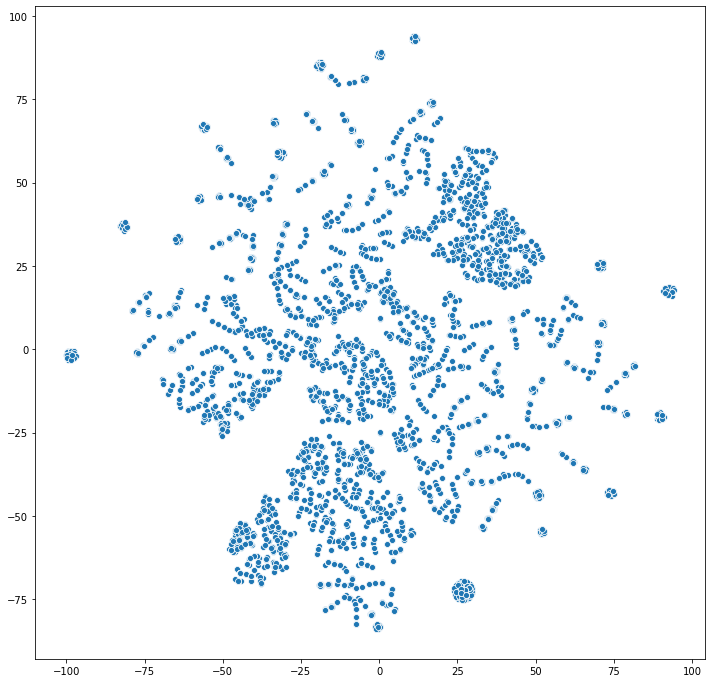

In [45]:
# Unpack and visualize the data from the tsne

tsne_1_x = []
tsne_1_y = []

#I am going to write my unpacking protocol as a function
#this way I can reuse it for additional reps

def tsne_unpack(tsne_array, list1, list2):
    for t in tsne_array:
        list1.append(t[0])
        list2.append(t[1])

tsne_unpack(ws_tsne1, tsne_1_x, tsne_1_y)

#function verified by printing tsne_1_x

#visualize the data using a scatter plot from seaborn
plt.figure(figsize = (12, 12))
sns.scatterplot(x = tsne_1_x, y = tsne_1_y)

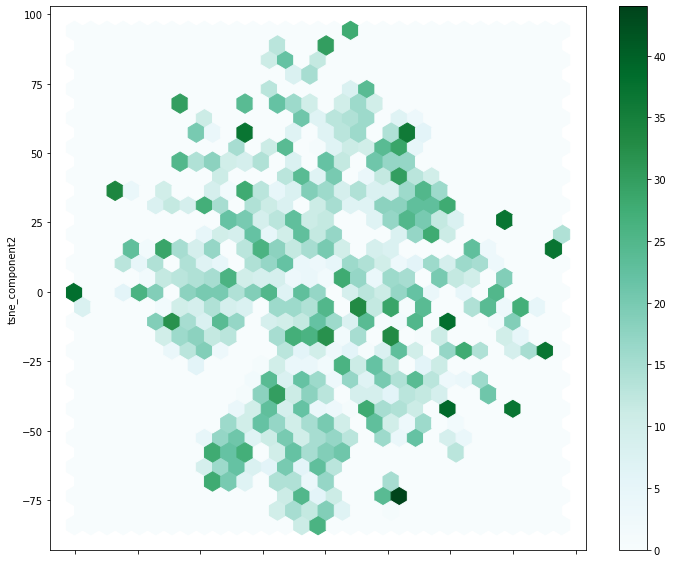

In [46]:
#try to visualize the same thing with a hexbin

tsne_1_dict = {'tsne_component1': tsne_1_x, 'tsne_component2': tsne_1_y}

tsne_vs_df = pd.DataFrame(tsne_1_dict)

tsne_vs_df.plot.hexbin(x = 'tsne_component1', y='tsne_component2', gridsize = 30, figsize = (12, 10))

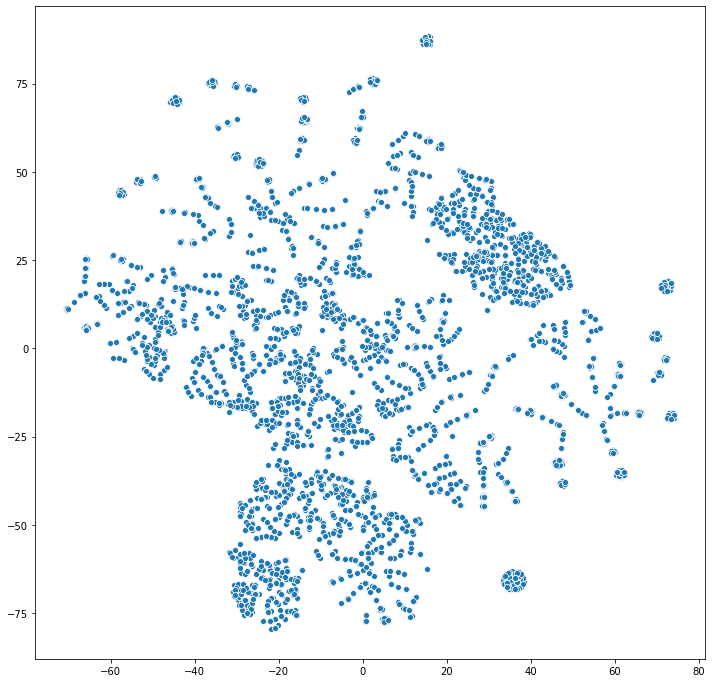

In [47]:
#write a function to aid the optimization run

def visny_tsne(tsne_instantiation):
    
    ws_tsne_iter = tsne_instantiation.fit_transform(ml_scale)
    
    tsne_x = []
    tsne_y = []
    
    tsne_unpack(ws_tsne_iter, tsne_x, tsne_y)
    
    plt.figure(figsize = (12, 12))
    sns.scatterplot(x = tsne_x, y = tsne_y)
    plt.show()
    
tsne2 = TSNE(random_state=42, perplexity = 40)

visny_tsne(tsne2)

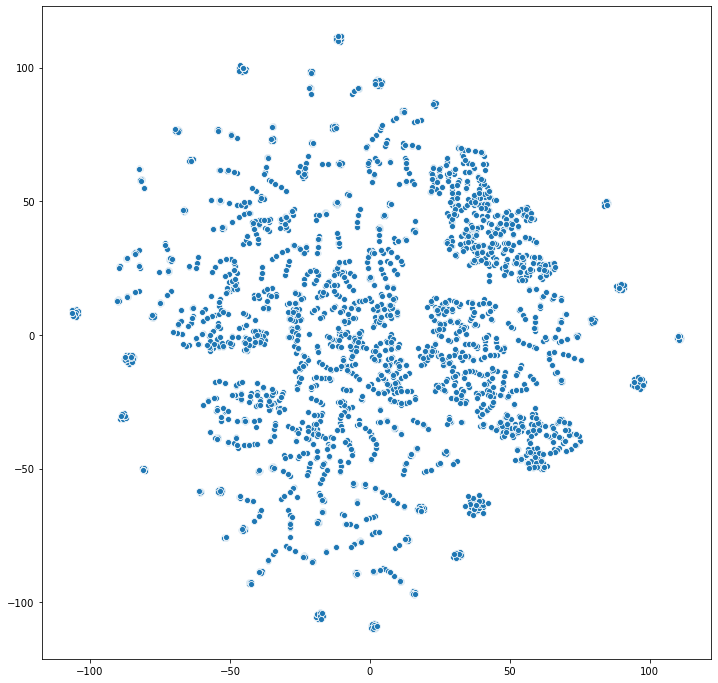

In [48]:
#I can see some clusters, but I'm not satisfied with the separation and want to tune some parameters

tsne3 = TSNE(random_state=42, perplexity = 20)

visny_tsne(tsne3)

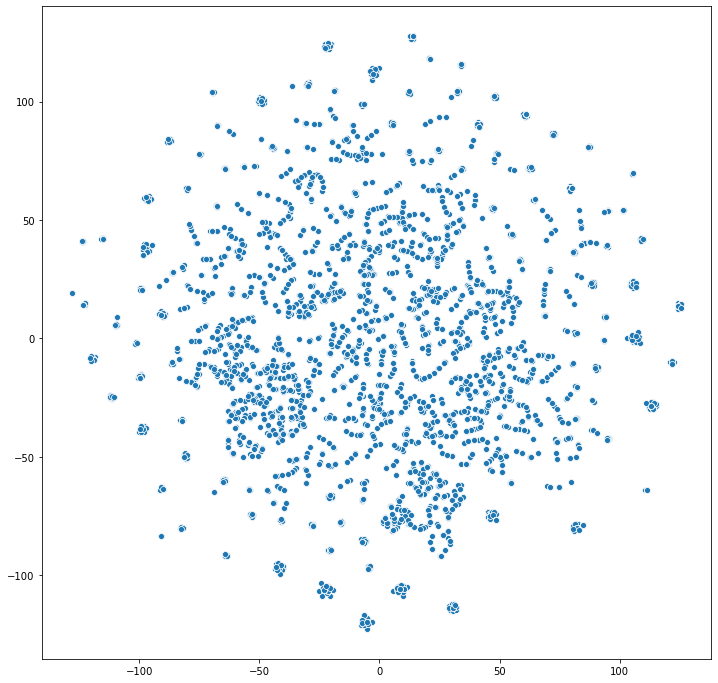

In [49]:
tsne4 = TSNE(random_state=42, perplexity = 10)

visny_tsne(tsne4)

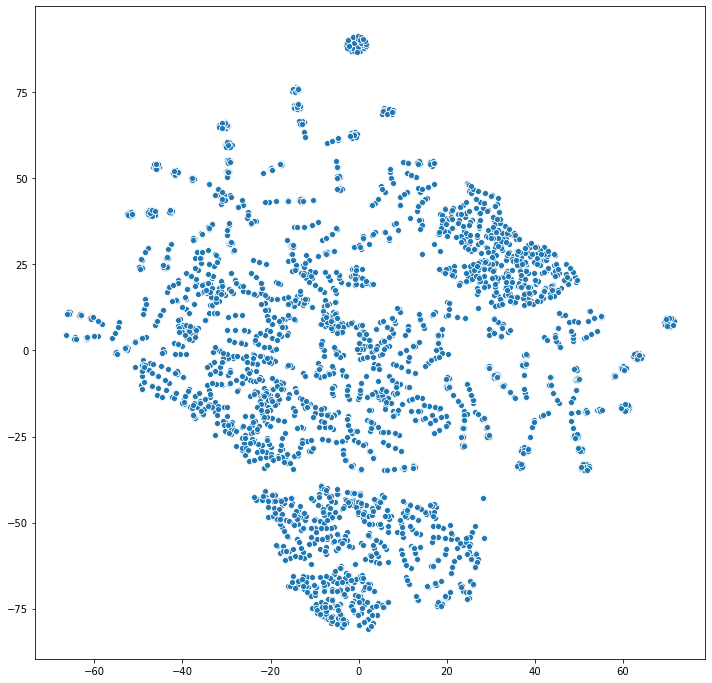

In [50]:
tsne5 = TSNE(random_state=42, perplexity = 50)

visny_tsne(tsne5)

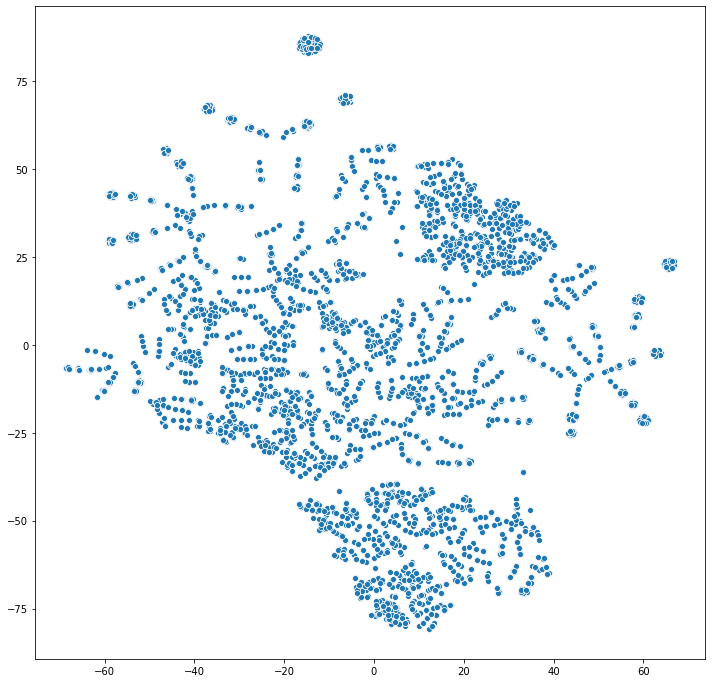

In [51]:
tsne6 = TSNE(random_state=42, perplexity = 50, learning_rate = 300)

visny_tsne(tsne6)

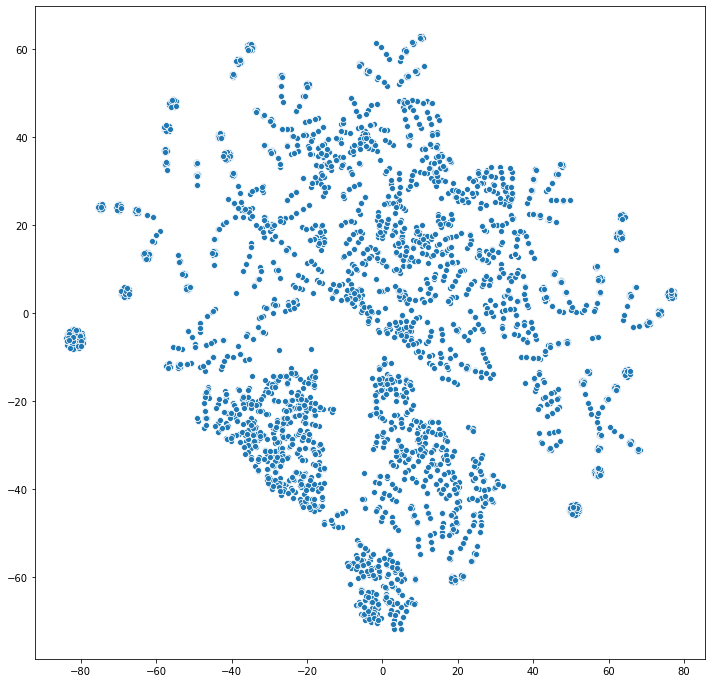

In [52]:
tsne7 = TSNE(random_state=42, perplexity = 50, learning_rate = 600)

visny_tsne(tsne7)

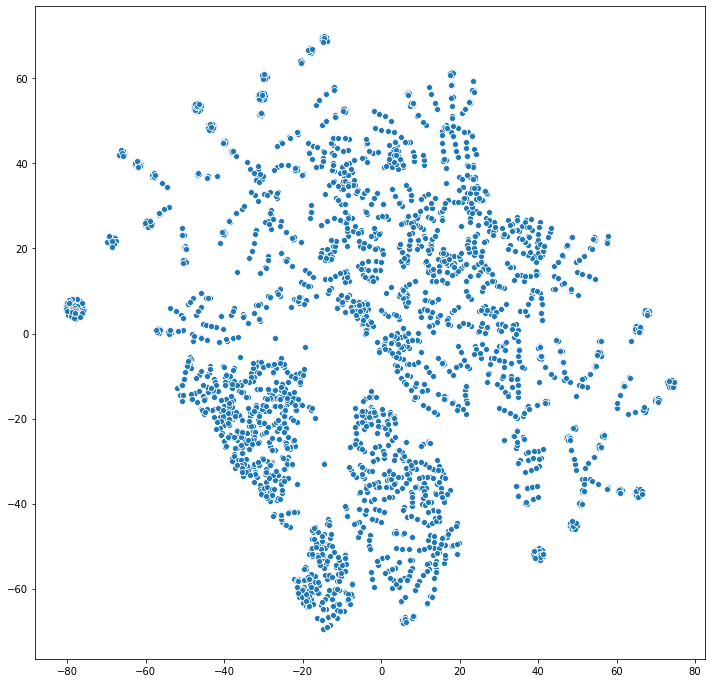

In [53]:
tsne8 = TSNE(random_state=42, perplexity = 50, learning_rate = 450)

visny_tsne(tsne8)

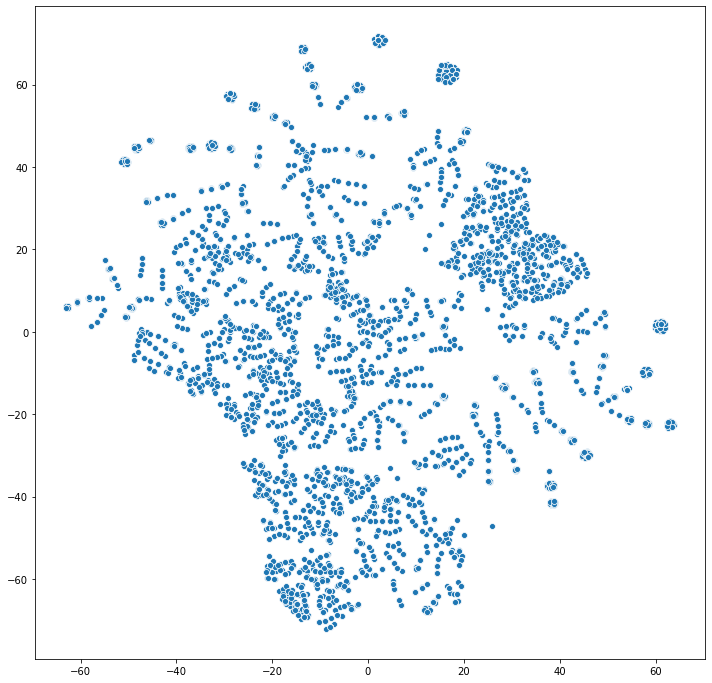

In [54]:
tsne9 = TSNE(random_state=42, perplexity = 50, learning_rate = 100)

visny_tsne(tsne9)

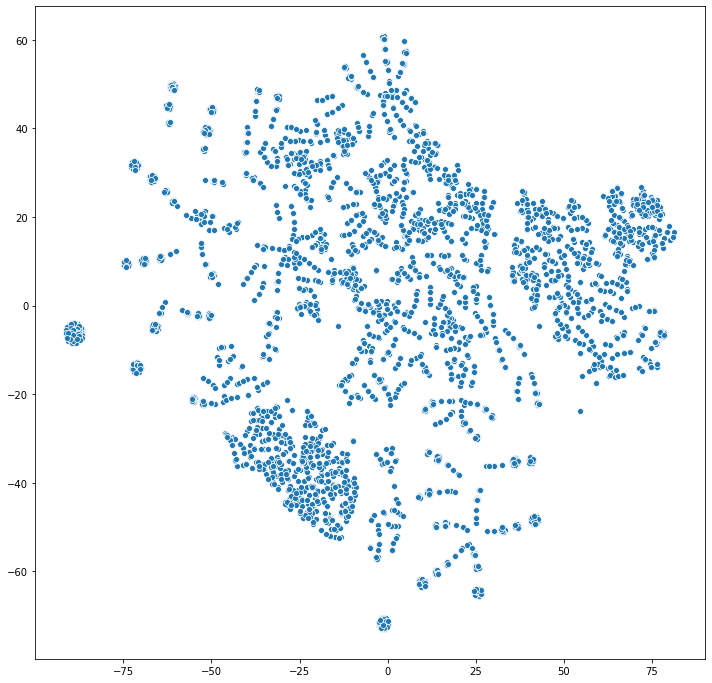

In [55]:
tsne10 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000)

visny_tsne(tsne10)

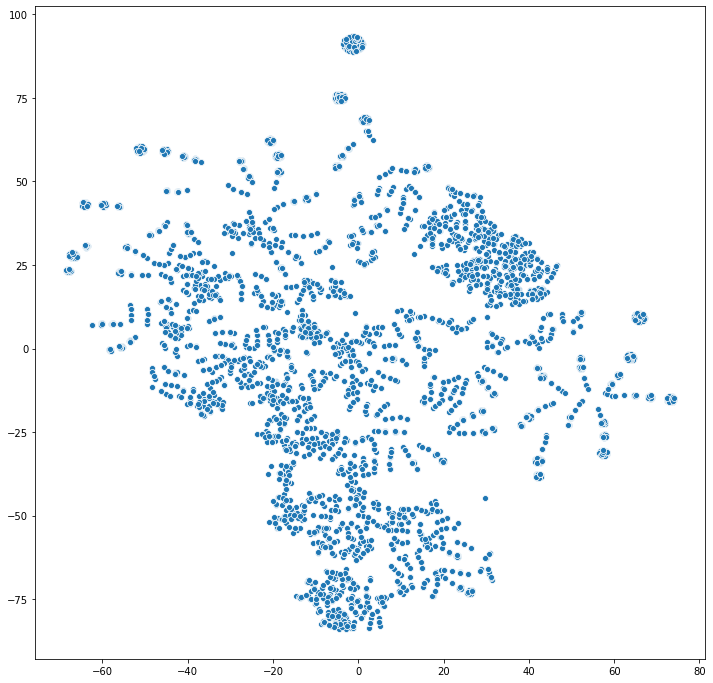

In [56]:
tsne11 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 20)

visny_tsne(tsne11)

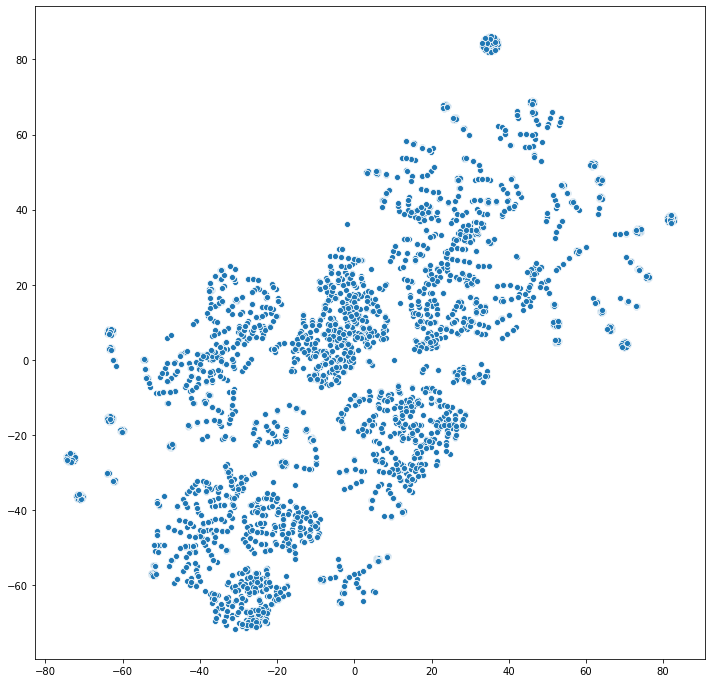

In [57]:
tsne12 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 30)

visny_tsne(tsne12)

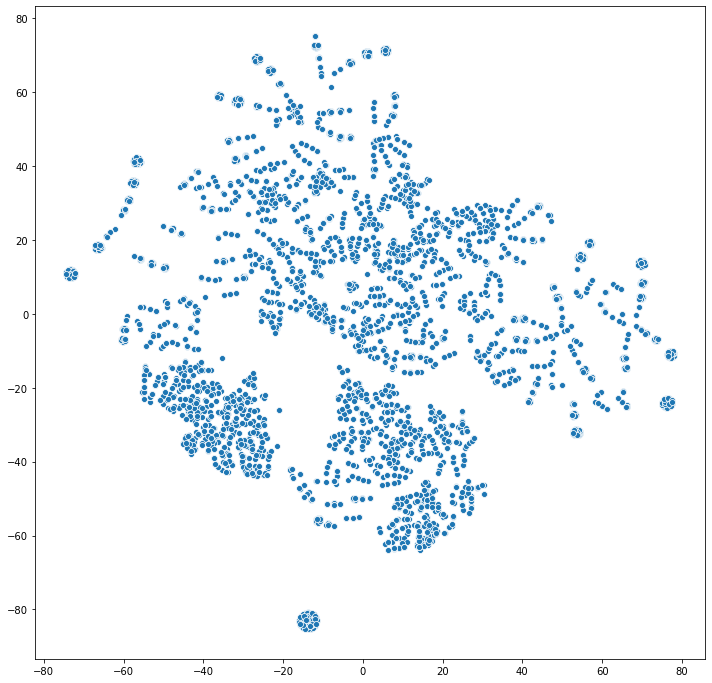

In [58]:
tsne13 = TSNE(random_state=42, perplexity = 50, learning_rate = 1000, early_exaggeration = 6)

visny_tsne(tsne13)

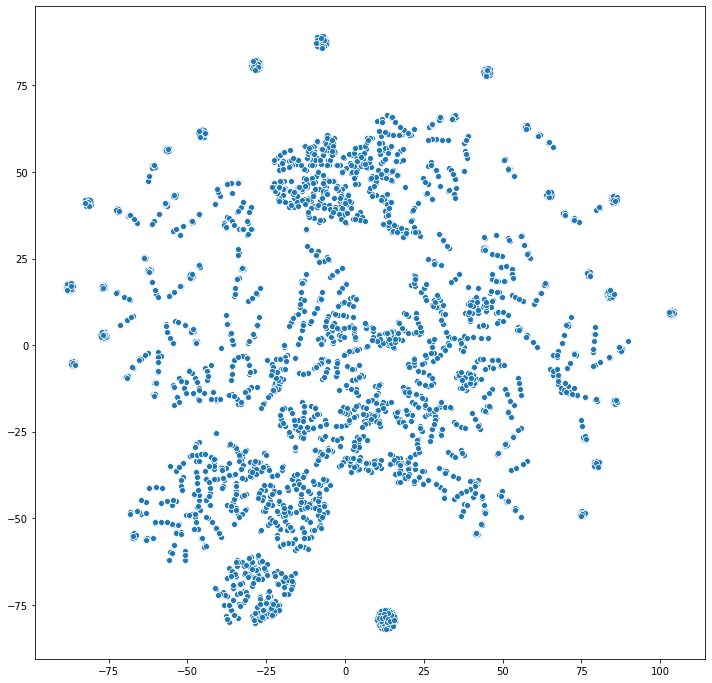

In [59]:
#try lower perplexity with a higher learning rate

tsne14 = TSNE(random_state=42, perplexity = 30, learning_rate = 1000)

visny_tsne(tsne14)

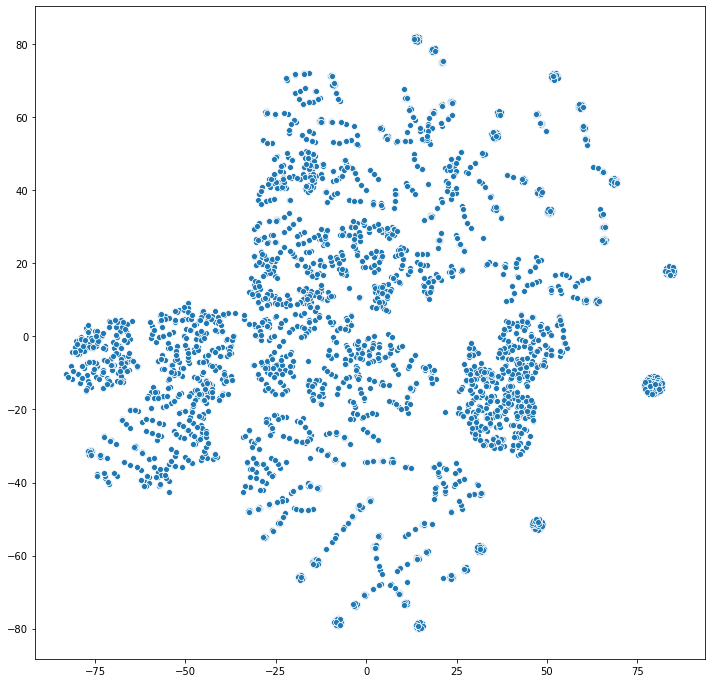

In [60]:
tsne15 = TSNE(random_state=42, perplexity = 40, learning_rate = 1000)

visny_tsne(tsne15)

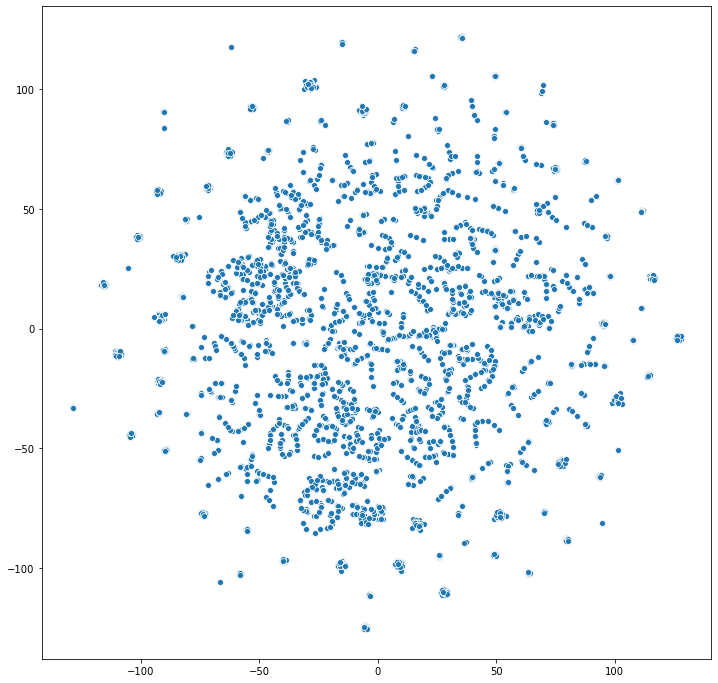

In [61]:
tsne16 = TSNE(random_state=42, perplexity = 10, learning_rate = 1000)

visny_tsne(tsne16)

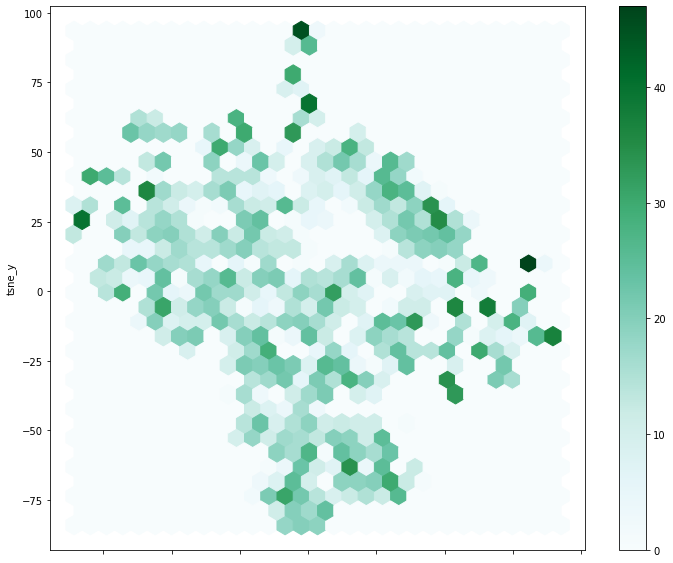

In [62]:
#t-SNE 11 looks like it obtained the best results, although it doesn't look like the data separates that well into clusters
#visualize this tsne using a hexbin plot

ws_tsne_max = tsne11.fit_transform(ml_scale)
    
tsne_x_max = []
tsne_y_max = []
    
tsne_unpack(ws_tsne_max, tsne_x_max, tsne_y_max)

tsne_max_dict = {'tsne_x': tsne_x_max, 'tsne_y': tsne_y_max}

tsne_max_df = pd.DataFrame(tsne_max_dict)

tsne_max_df.plot.hexbin(x = 'tsne_x', y='tsne_y', gridsize = 30, figsize = (12, 10))

plt.show()

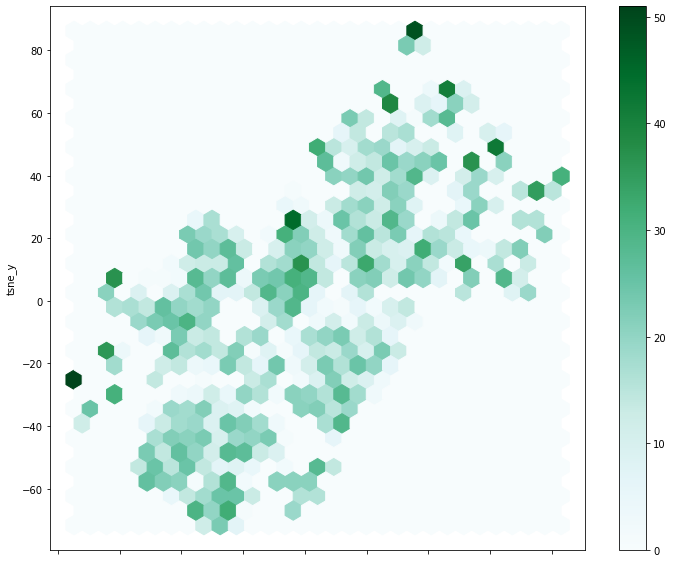

In [63]:
ws_tsne_max = tsne12.fit_transform(ml_scale)
    
tsne_x_max = []
tsne_y_max = []
    
tsne_unpack(ws_tsne_max, tsne_x_max, tsne_y_max)

tsne_max_dict = {'tsne_x': tsne_x_max, 'tsne_y': tsne_y_max}

tsne_max_df = pd.DataFrame(tsne_max_dict)

tsne_max_df.plot.hexbin(x = 'tsne_x', y='tsne_y', gridsize = 30, figsize = (12, 10))

plt.show()

I'm getting the best results out of 12 here. Having only combined features leads to problems for clustering, but there are some irregularly shaped clusters here, of different densities.  